In [139]:
import numpy as np
import seaborn as sns
import tensorflow as tf
%pylab inline

sess = tf.InteractiveSession()

Populating the interactive namespace from numpy and matplotlib


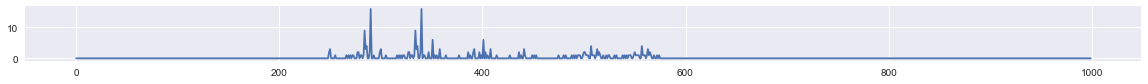

In [140]:
lines = open('bdgenomics_data/featuresAndLabels.txt').readlines()  # ATAC-seq data

label_names = lines[0][1:].strip().split(',')
labels = np.array([map(int, x.split(';')[0].strip().split(',')) for x in lines[1:]])
features = np.array([map(int, x.split(';')[1].strip().split(',')) for x in lines[1:]])

feature = features[25]
plt.figure(figsize=[20, 1])
plt.plot(feature)

In [128]:
# def gauss_kern(M, s=1.0):
#     x = np.linspace(-s * 2 * np.pi, s * 2 * np.pi, M)
#     return np.exp(-0.5 * (x**2)) * np.pi**(-0.25)

# def gauss_smoothing(input_, pooling_window=1):
#     from scipy.signal import convolve
#     kernel = gauss_kern(pooling_window)
#     return convolve(input_, kernel, mode='valid')

# def total_pooling(input_, pooling_window=1):
#     from scipy.signal import convolve
#     kernel = np.ones(pooling_window)
#     return convolve(input_, kernel, mode='valid')

# def average_pooling(input_, pooling_window=1):
#     from scipy.signal import convolve
#     kernel = np.ones(pooling_window) / pooling_window
#     return convolve(input_, kernel, mode='valid')

def normalize(input_):
    return input_/np.sum(input_)

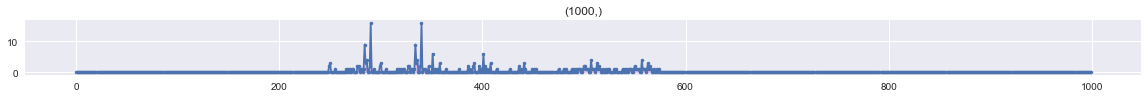

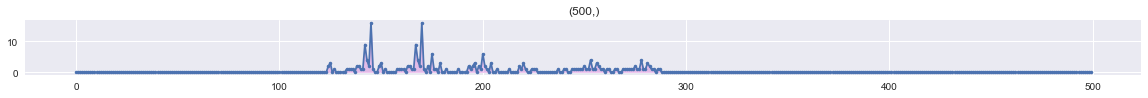

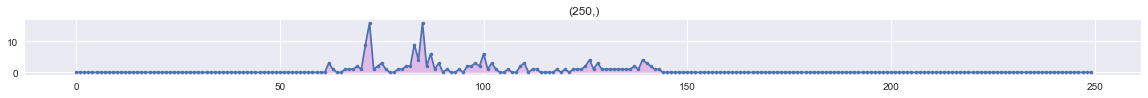

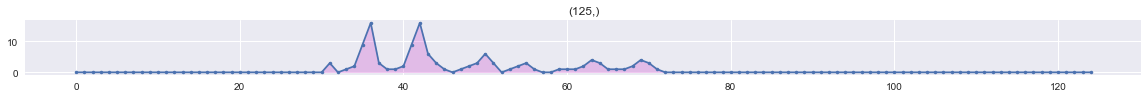

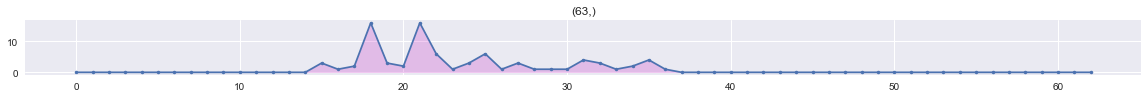

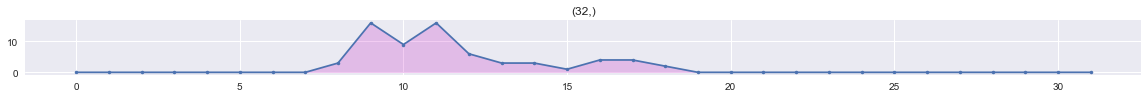

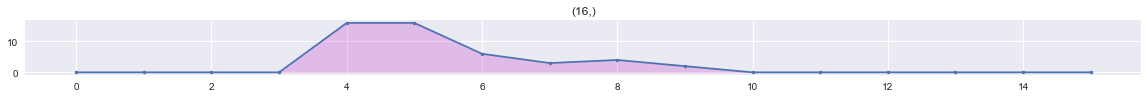

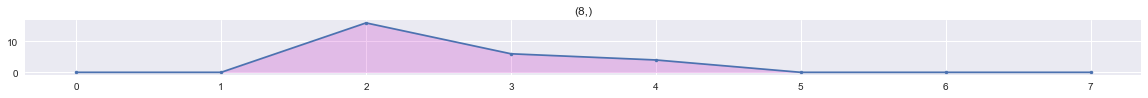

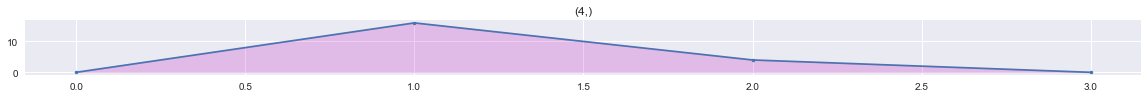

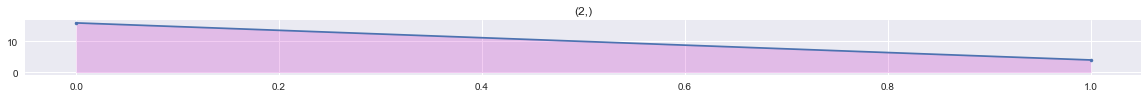

In [180]:
feature = feature.reshape([1, -1, 1]).astype(np.float32)

for i in range(10):
    resolution = 2**i
    retina_macula_fovea = tf.nn.pool(
        input=feature,
        window_shape=[resolution],
        strides=[resolution],
        pooling_type='MAX',
        padding='SAME')
    retina_macula_fovea = retina_macula_fovea.eval()
    retina_macula_fovea = retina_macula_fovea.reshape([-1])
    plt.figure(figsize=[20, 1])
    plt.plot(retina_macula_fovea, marker='.')
    plt.title(retina_macula_fovea.shape)
    plt.fill_between(
        x=np.arange(retina_macula_fovea.shape[0]),
        y1=0, y2=retina_macula_fovea,
        color='m',
        alpha=0.2)

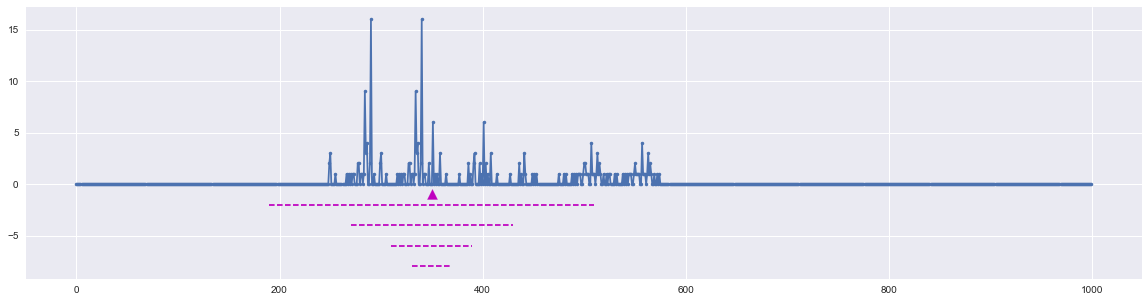

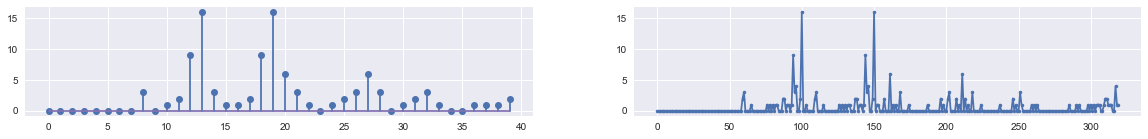

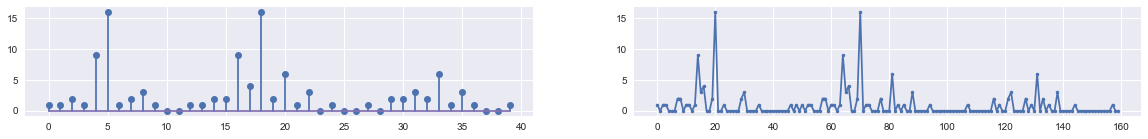

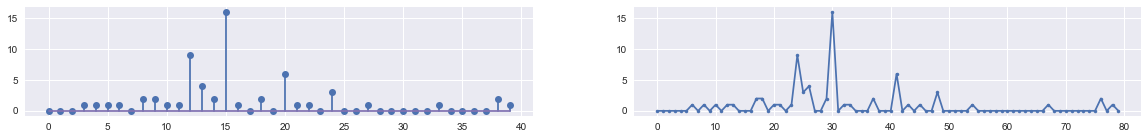

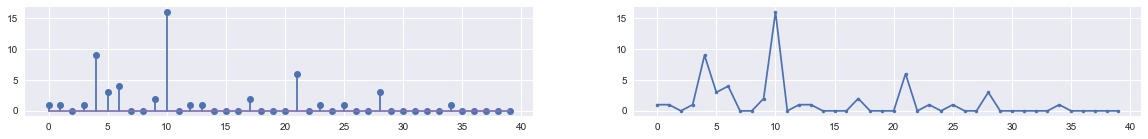

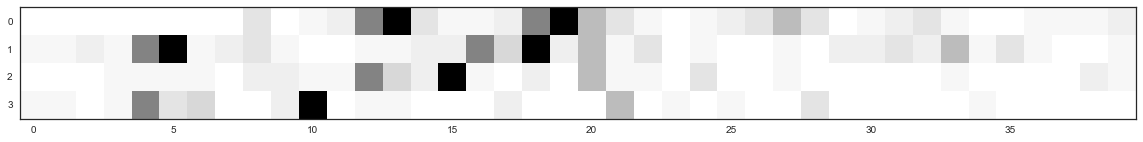

In [185]:
feature = feature.reshape([1, -1, 1]).astype(np.float32)

input_length = 1000  # feature.shape[1]
basal_focus = 350  # initial focal point
focal_flange = 20  # extending each side
glimpse_width = input_length/(2*focal_flange+1)
glimpse_height = int(np.floor(np.log2(glimpse_width)))

rows = []

_, top_ax = plt.subplots(1, 1, figsize=[20, 5])
top_ax.plot(feature.reshape([-1]), marker='.')
top_ax.scatter(basal_focus, -1, marker='^', color='m', s=100)

for i in reversed(range(glimpse_height)):
    resolution = 2**i
    focus = basal_focus/resolution
    retina_macula_fovea = tf.nn.pool(
        input=feature,
        window_shape=[resolution],
        strides=[resolution],
        pooling_type='MAX',
        padding='SAME')
    retina_macula_fovea = retina_macula_fovea.eval()
    retina_macula_fovea = retina_macula_fovea.reshape([-1])
    retina_macula_fovea = retina_macula_fovea[focus-focal_flange:focus+focal_flange]
    rows.append(retina_macula_fovea)
    fig, ax = plt.subplots(1, 2, figsize=[20, 2])
    # ax[0].plot(retina_macula_fovea, marker='.')
    ax[0].stem(retina_macula_fovea)
    ax[1].plot(feature.reshape([-1])[
        basal_focus-resolution*focal_flange:
        basal_focus+resolution*focal_flange],
        marker='.')
    top_ax.hlines(
        y=-2*(glimpse_height - i),
        xmin=basal_focus-resolution*focal_flange,
        xmax=basal_focus+resolution*focal_flange,
        color='m',
        linestyle='--')
    
with sns.axes_style('white'):
    plt.figure(figsize=[20, 5])
    plt.imshow(normalize(np.stack(rows)))